In [3]:
# Librerías para el tratamiento de los datos
import numpy as np 
import pandas as pd
import math
import random

# Librerías para entrenamiento y modelado
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = pd.read_csv('./Salary.csv')

salary_data.sample(10)

,YearsExperience,Salary
4,2.2,39891
16,5.1,66029
26,9.5,116969
20,6.8,91738
28,10.3,122391
7,3.2,54445
17,5.3,83088
27,9.6,112635
3,2.0,43525
32,12.3,128765


Mostramos informacion de los datos

In [4]:
salary_data.shape
salary_data.info()
salary_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Graficamos la distribucion de la experiencia y el salario

Text(0, 0.5, 'Salary')

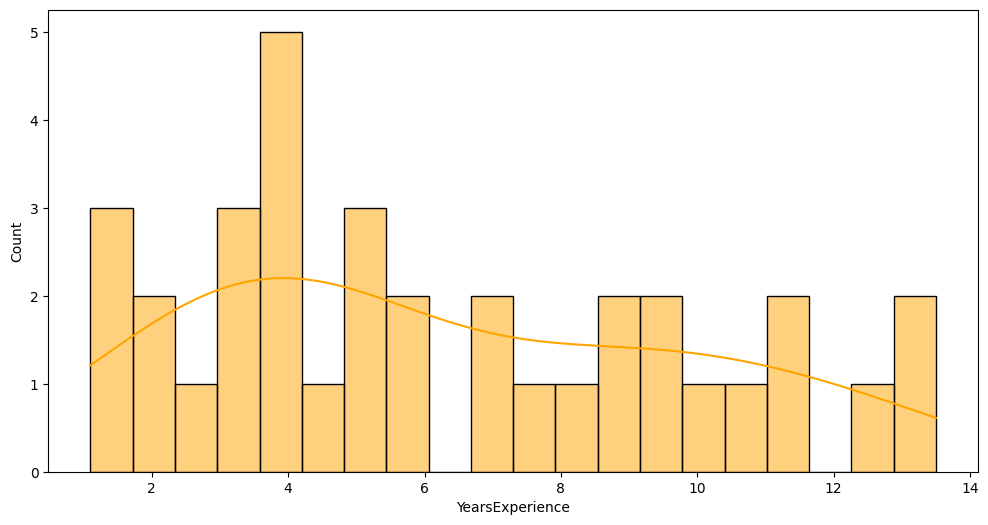

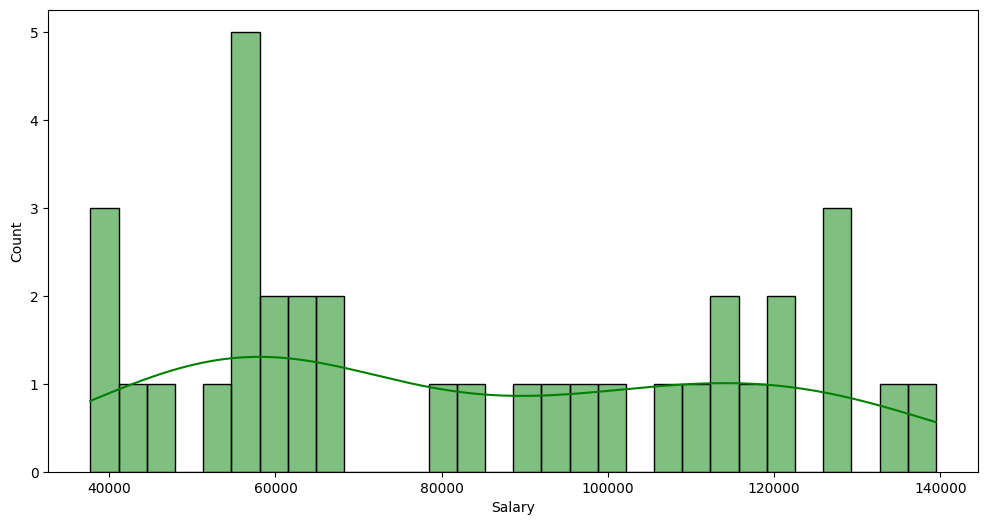

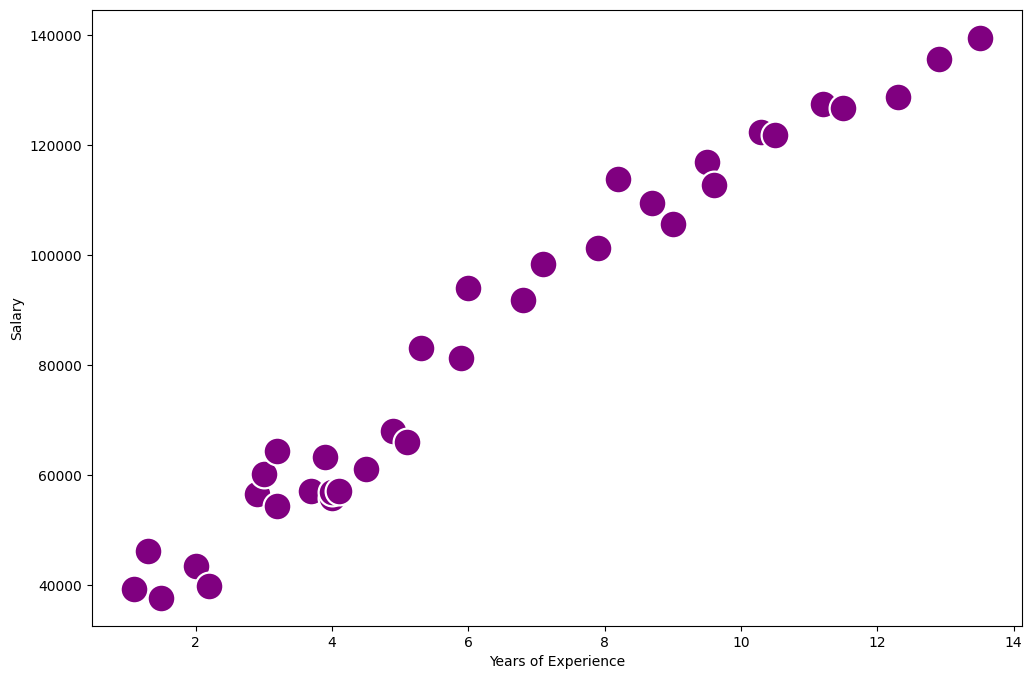

In [5]:
plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['YearsExperience'], bins = 20, kde = True, color = 'orange')

plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['Salary'], bins = 30, kde = True, color = 'green')

plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'YearsExperience', y = 'Salary', 
                s = 400, color = 'purple',
                data = salary_data)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Comenzamos a codificar la regresión lineal usando pso

Tenemos dos variables a optimizar: a y b

siendo
y = a + bx
la ecuación de una recta

generamos los valores a,b usando pso y evaluamues en la funcion de aptitud
sumatoria((yR-yC)^2/n-2)

In [6]:
#Generamos los valores aleatorios para a y b entre sus maximos y minimos correspondientes
rectas = [[0, 0] for _ in range(35)]

for i in range(35):
    a = np.random.randint(83945, 139465)#Maximo y minimo de la variable Salary
    b = np.random.randint(1.1, 13.5)#Maximo y minimo de la variable YearsExperience
    rectas[i] = [a, b]

#Establecemos los valores de w (inercia), v (velocidad inicial), c1 (coeficiente de aprendizaje personal), c2 (coeficiente de aprendizaje social), r1 (random personal), r2 (random social)

w = 0.7
c1 = 0.8
c2 = 0.9
r1 = 0.3
r2 = 0.4
v = [[0.3, 0.3] for _ in range(35)]

#Creamos una funcion
def fitness_function(a, b):
    sumatoria = 0
    for i in range(35):
        sumatoria += (salary_data['Salary'][i] - (a + b*salary_data['YearsExperience'][i]))**2

    return math.sqrt(sumatoria/35-2)

#Evaluamos la funcion fitness para cada particula
fitness = [0 for _ in range(35)]

for i in range(35):
    fitness[i] = fitness_function(rectas[i][0], rectas[i][1])

#Buscamos el pbest y el gbest (los maximos)
pbest = [[0, 0] for _ in range(35)]
gbest = [0 for _ in range(2)]
for i in range(35):
    pbest[i] = rectas[i]#el mejor personal es el unico que existe hasta el meomento
    gbest = rectas[fitness.index(min(fitness))]#el mejor global es el mejor de todos los individuos aleatorios


Ahora Iniciaremos la codificación del bucle que ejecuta el algoeritmo de pso varias veces hasta converger

El mejor valor de a es:  28859.526089281626  ,  8731.941066603564


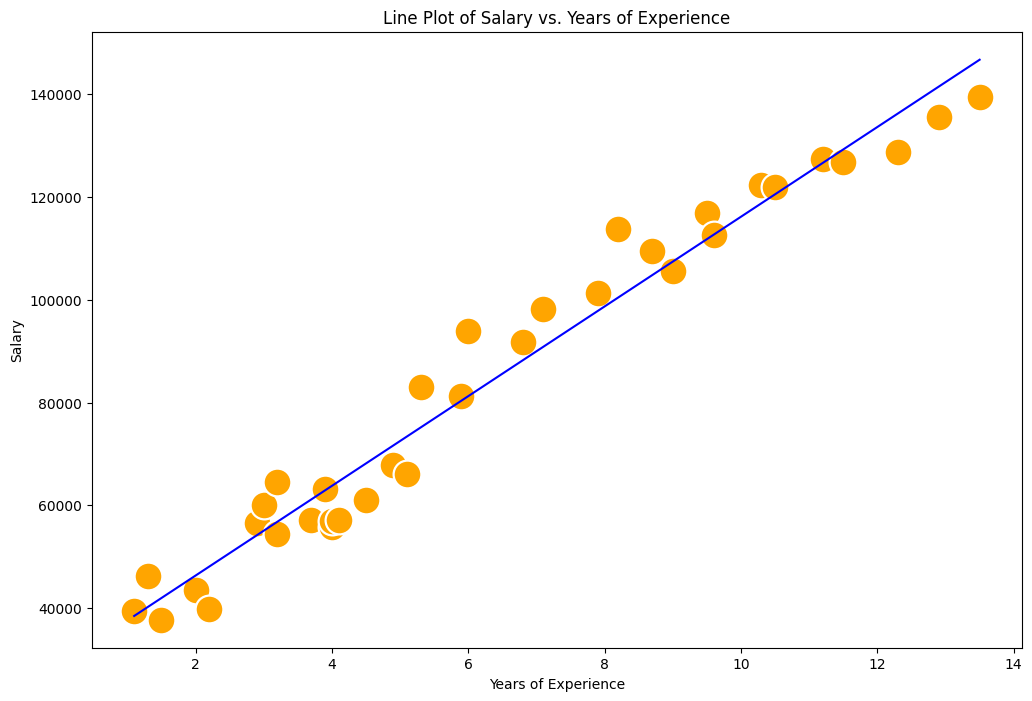

In [142]:
#Bumero maximo de iteraciones
max_iter = 2000

while max_iter > 0:
    for i in range(35):
        for j in range(2):
            #calculamos nuevos valores para r1 y r2
            r1 = np.random.uniform(0, 0.6)
            r2 = np.random.uniform(0, 0.6)
            v[i][j] = w*v[i][j] + c1*r1*(pbest[i][j] - rectas[i][j]) + c2*r2*(gbest[j] - rectas[i][j])
            rectas[i][j] = rectas[i][j] + v[i][j]
            #Calculamos los limites para salary
            """ if j==1:
                if rectas[i][1] > 140000:
                  rectas[i][1] = 140000
                elif rectas[i][1] < 0: 
                  rectas[i][1] = 0
            #Calculamos los limites para YearsExperience
            if j==0:
                if rectas[i][0] > 13.5:
                  rectas[i][0] = 13.5
                elif rectas[i][0] < 1.1:
                  rectas[i][0] = 1.1 """
        #calculamos su aptitud
        fitness[i] = fitness_function(rectas[i][0], rectas[i][1])
        if fitness[i] < fitness_function(pbest[i][0], pbest[i][1]):
            pbest[i] = rectas[i]
        if fitness[i] < fitness_function(gbest[0], gbest[1]):
            gbest = rectas[i]
    max_iter -= 1

print("El mejor valor de a es: ", gbest[0], ' , ', gbest[1])
# Crear datos de ejemplo (debes tener tus propios datos)
x = salary_data['YearsExperience']
y = gbest[0]+gbest[1]*x # Ecuación de la línea recta

# Crear una figura y un eje
f, ax = plt.subplots(figsize=(12, 8))

# Graficar los puntos en color naranja (asegúrate de tener tus propios datos)
sns.scatterplot(x=salary_data['YearsExperience'], y=salary_data['Salary'], s=400, color='orange')

# Graficar la línea recta en color azul
plt.plot(x, y, color='blue')

# Agregar etiquetas y título
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Line Plot of Salary vs. Years of Experience')

# Mostrar la gráfica
plt.show()